# **Heart Disease**
* **age**: Idade da pessoa, em anos
* **sex**: Sexo da pessoa (1 = masculino, 0 = feminino)
* **cp**: Tipo de dor no peito experimentada (Valor 1: angina típica, Valor 2: angina atípica, Valor 3: dor não anginosa, Valor 4: assintomático)
* **trestbps**: Pressão arterial de repouso da pessoa (em mm Hg, medida na admissão hospitalar)
* **chol**: Medida de colesterol da pessoa (em mg/dl)
* **fbs**: Glicemia de jejum da pessoa (> 120 mg/dl, 1 = verdadeiro; 0 = falso)
* **restecg**: Resultado do eletrocardiograma em repouso (0 = normal, 1 = anormalidade na onda ST-T, 2 = possível ou definitiva hipertrofia ventricular esquerda segundo os critérios de Estes)
* **thalach**: Frequência cardíaca máxima atingida pela pessoa
* **exang**: Angina induzida por exercício (1 = sim; 0 = não)
* **oldpeak**: Depressão do segmento ST induzida por exercício em relação ao repouso ('ST' se refere às posições no gráfico de ECG. Veja mais aqui)
* **slope**: Inclinação do segmento ST no pico do exercício (Valor 1: ascendente, Valor 2: plano, Valor 3: descendente)
* **ca**: Número de vasos principais (0–3)
* **thal**: Uma desordem sanguínea chamada talassemia (3 = normal; 6 = defeito fixo; 7 = defeito reversível)
* **target**: Doença cardíaca (0 = Não, 1 = Sim)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold

In [11]:
df = pd.read_csv('data/raw/heart.csv')

In [17]:
df.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [18]:
# verficar se tem linhas em branco
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
# verficar se tem linhas duplicadas
df.duplicated().sum()

np.int64(723)

In [22]:
hd = df.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [23]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


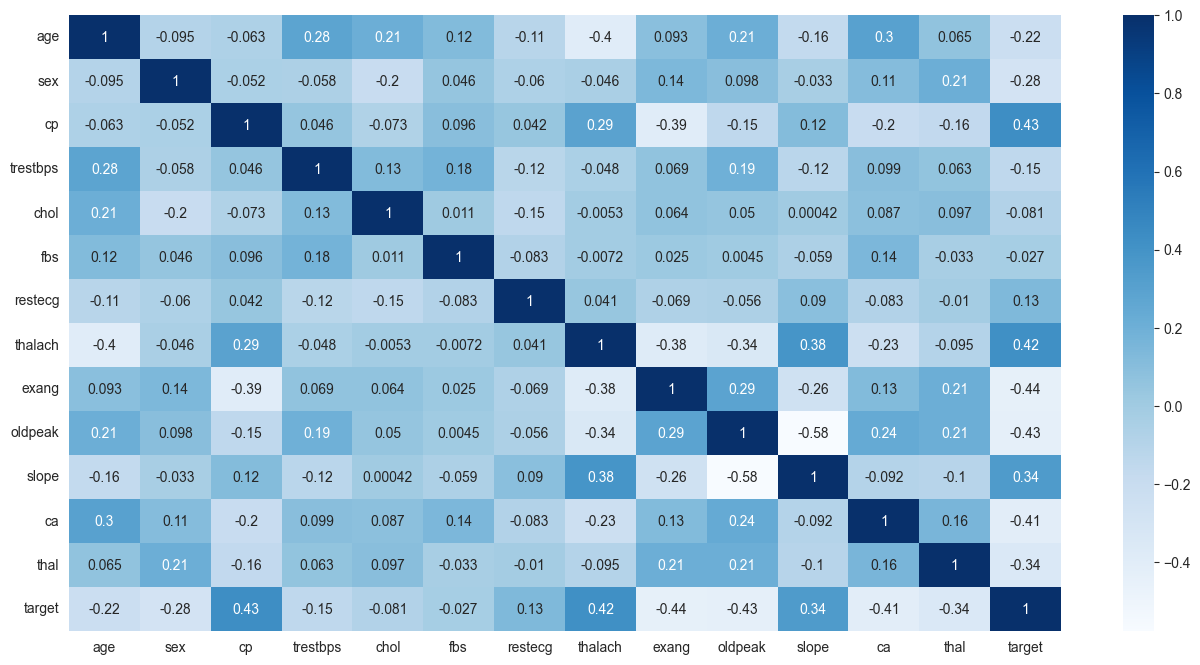

In [28]:
plt.figure(figsize=(16,8))
sns.heatmap(hd.corr(), annot=True, cmap="Blues");

In [29]:
hd.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [31]:
# separando as colunas categoricas e numericas, com mais opções é numericas
for c in hd.columns:
    print(f"{c}: {hd[c].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [32]:
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

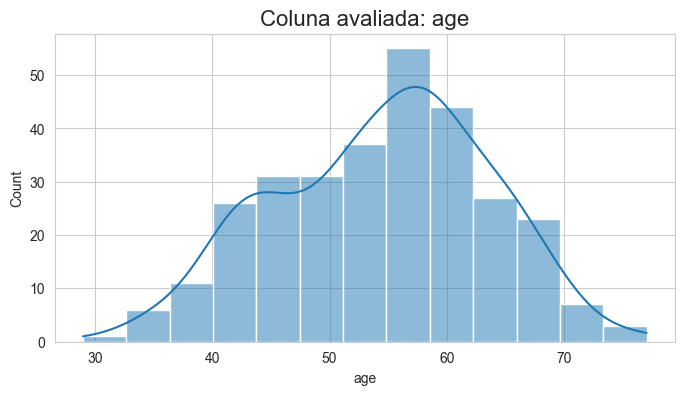

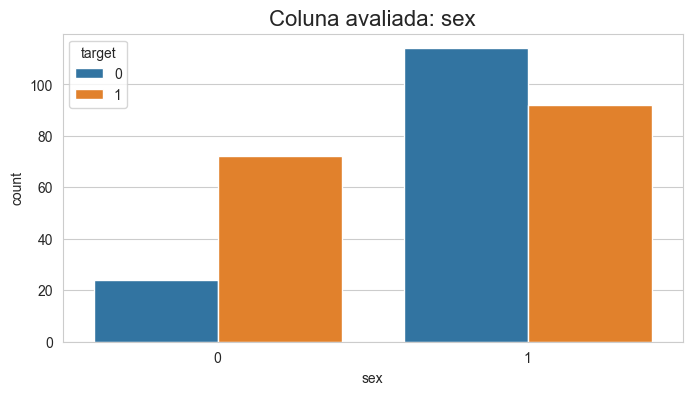

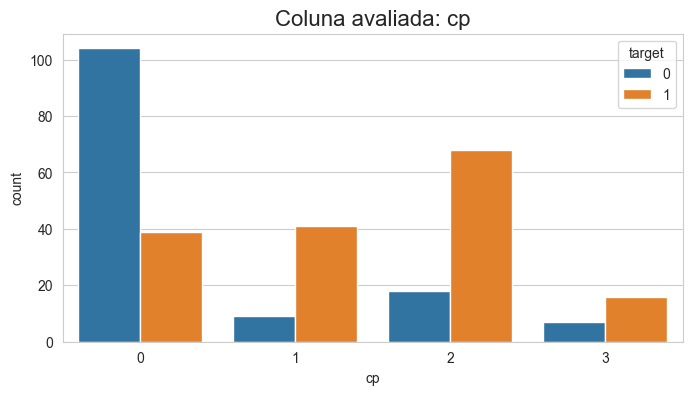

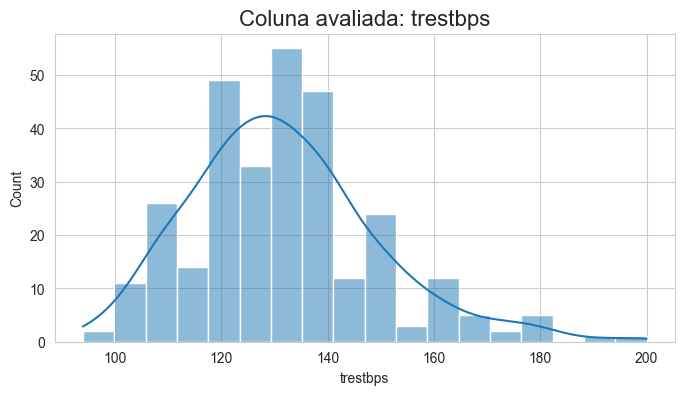

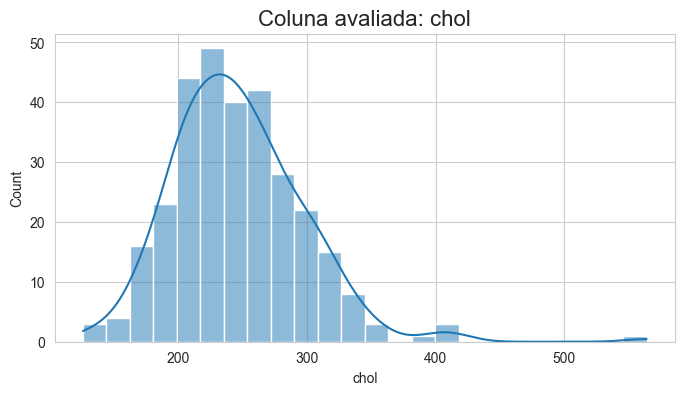

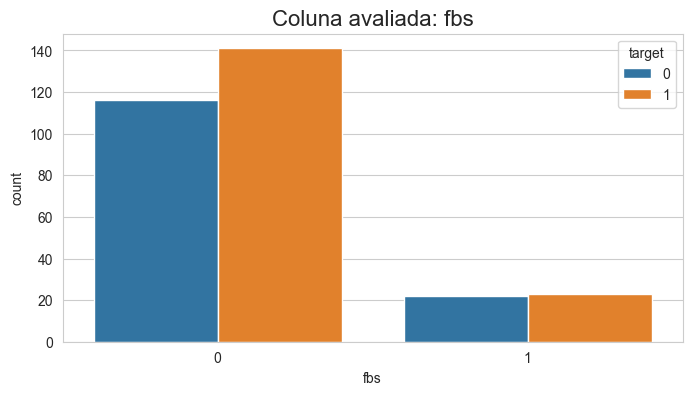

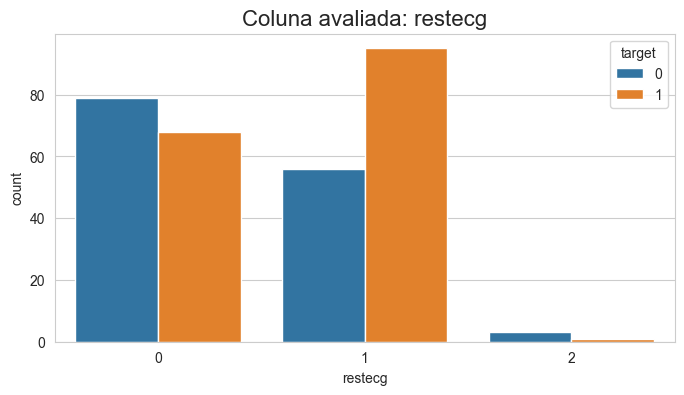

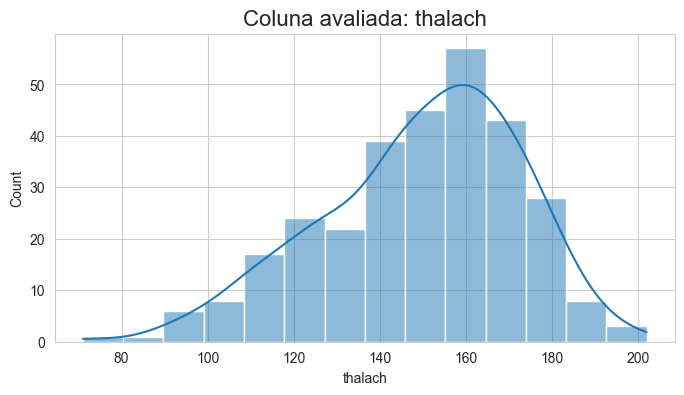

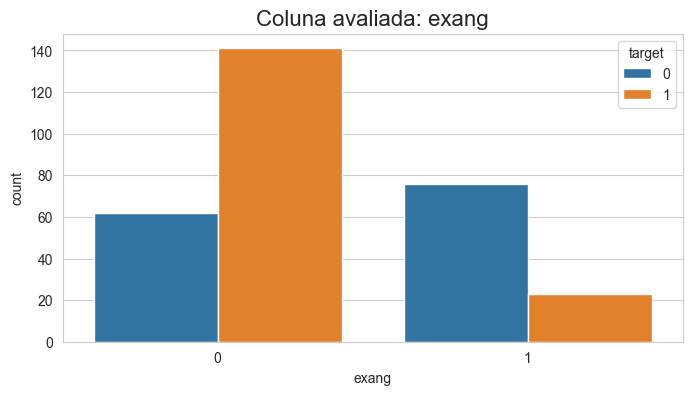

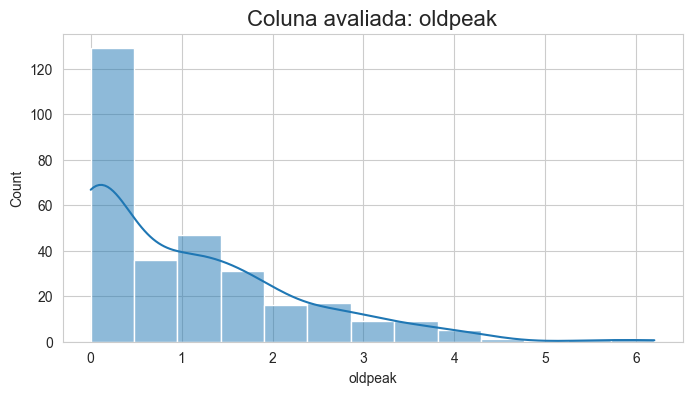

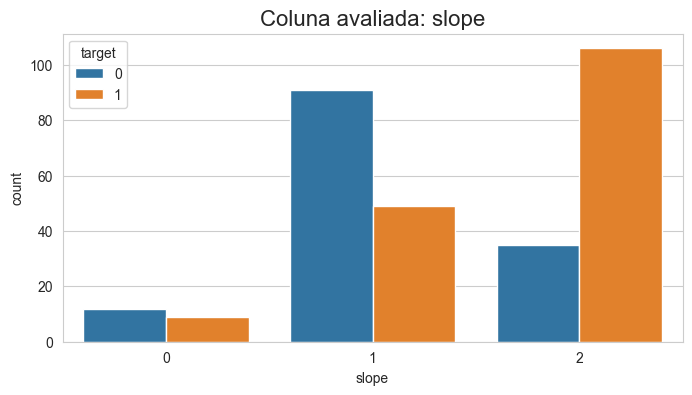

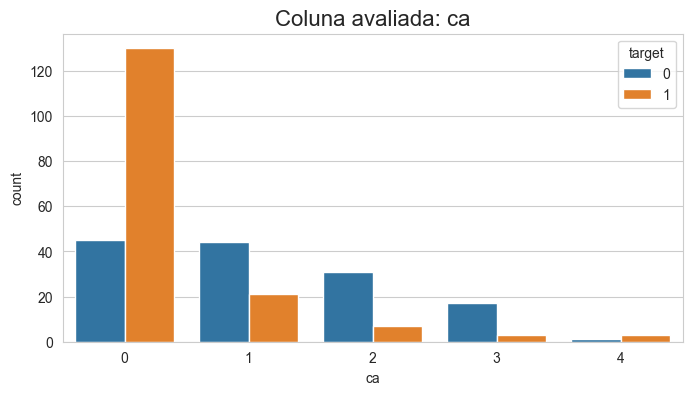

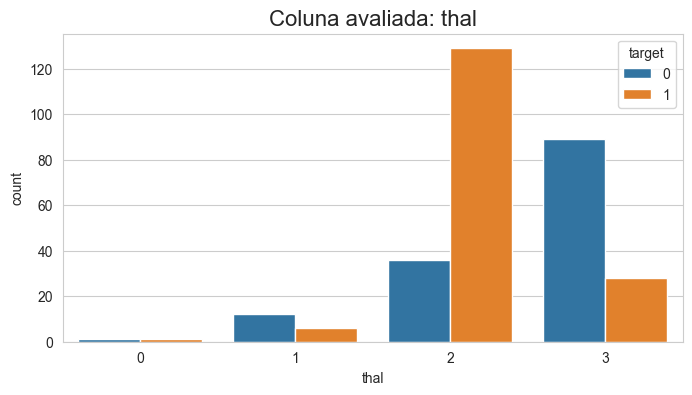

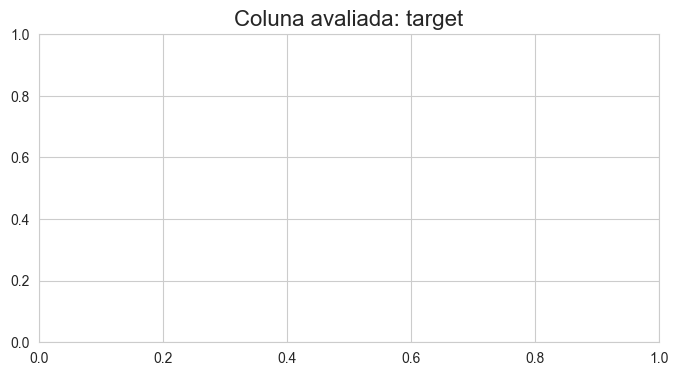

In [36]:
for c in hd.columns:
    plt.figure(figsize= (8,4))
    plt.title(f"Coluna avaliada: {c}", fontsize = 16)
    if c in categoricas:
        sns.countplot(x=hd[c], hue = hd['target'])
    if c in numericas:
        sns.histplot(hd[c], kde = True)

# Removendo Outliers

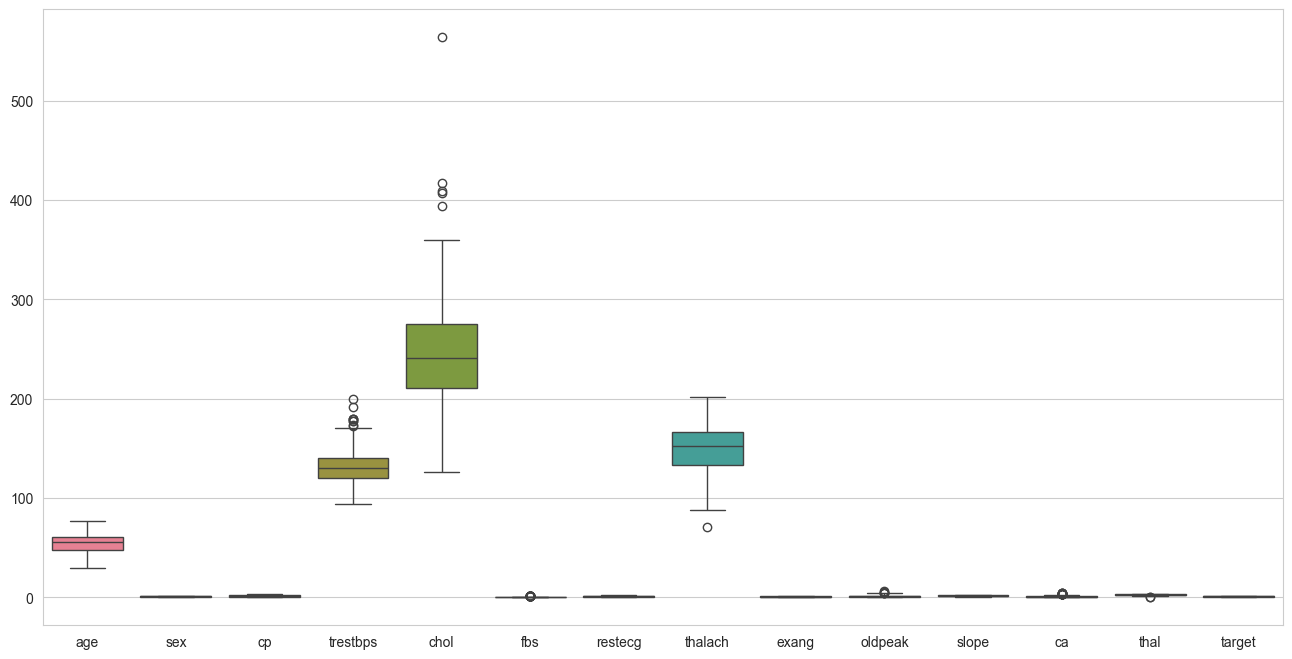

In [48]:
plt.figure (figsize = (16,8))
sns.boxplot(data = hd);

In [39]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [54]:
# Removendo de trestbps e chol
# Calculando quando seria remover 1%
hd["trestbps"].quantile(0.99)

np.float64(180.0)

In [66]:
hd1 = hd[hd["trestbps"]< hd['trestbps'].quantile(0.99)]
hd1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


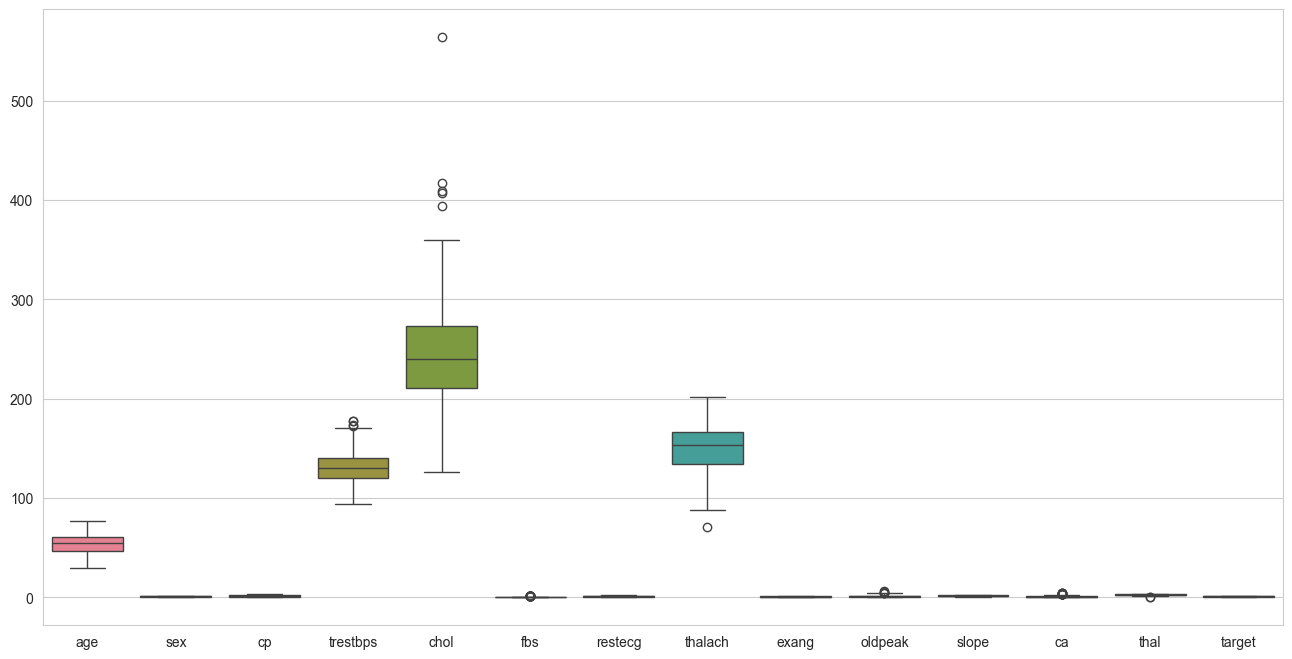

In [71]:
plt.figure (figsize = (16,8))
sns.boxplot(data = hd1);

In [68]:
hd1["chol"].quantile(0.98)

np.float64(354.4799999999999)

In [69]:
hd2 = hd1[hd1["chol"]< hd1['chol'].quantile(0.98)]
hd2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,54.158076,0.701031,0.969072,130.491409,241.907216,0.144330,0.536082,149.457045,0.323024,1.016151,1.402062,0.714777,2.305842,0.546392
std,9.064278,0.458595,1.035111,16.142761,44.214699,0.352029,0.519851,23.061553,0.468437,1.143368,0.615766,1.005719,0.615266,0.498701
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


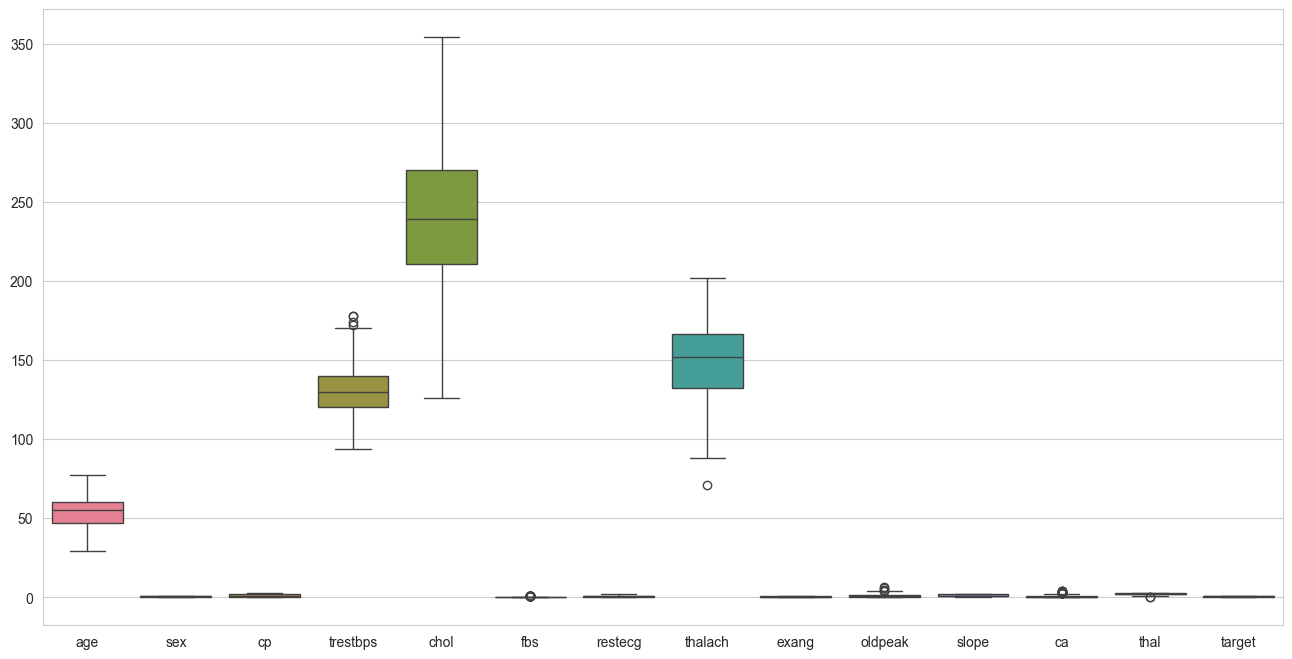

In [70]:
plt.figure (figsize = (16,8))
sns.boxplot(data = hd2);

In [73]:
hd2["thalach"].quantile(0.005)

np.float64(88.9)

In [76]:
hd3 = hd2[hd2["thalach"]> hd2['thalach'].quantile(0.005)]
hd3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.103806,0.698962,0.975779,130.453287,241.813149,0.145329,0.532872,149.941176,0.321799,1.015571,1.404844,0.716263,2.304498,0.550173
std,9.062454,0.459505,1.035533,16.137174,44.326594,0.353043,0.520209,22.378685,0.467977,1.147279,0.616985,1.008185,0.615777,0.498339
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


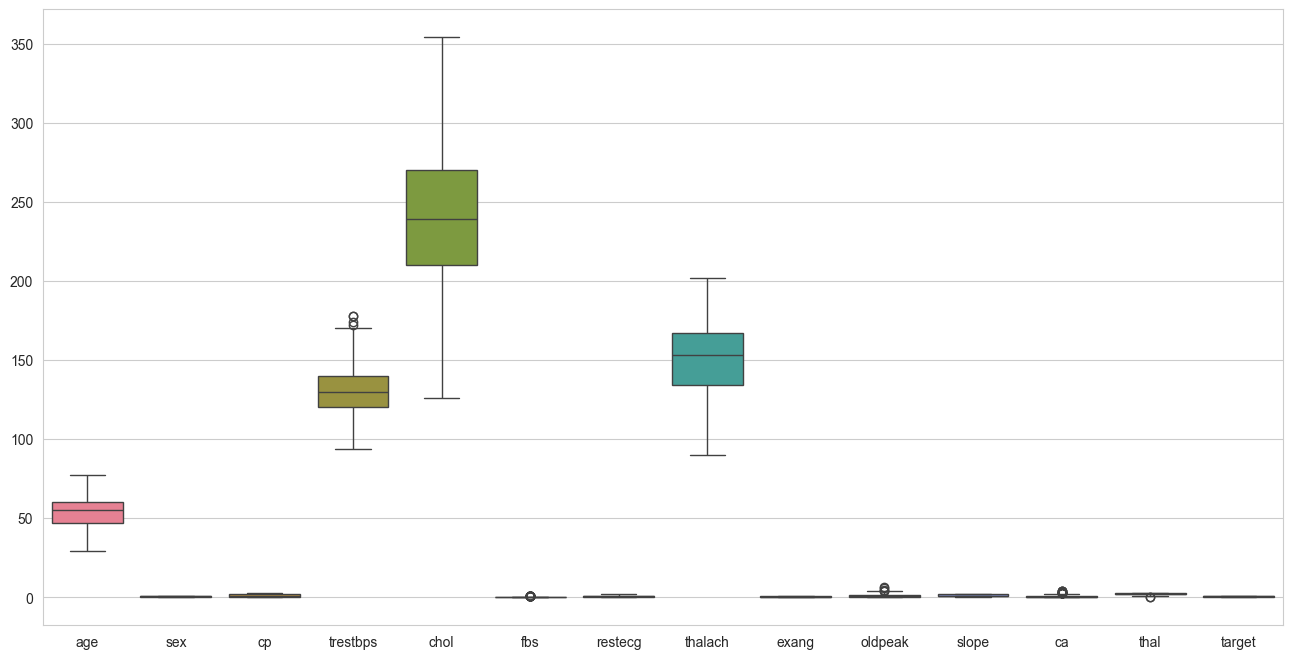

In [77]:
plt.figure (figsize = (16,8))
sns.boxplot(data = hd3);

In [ ]:
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [80]:
# Adicionar dps o drop_frist

hd4 = pd.get_dummies(hd3, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
hd4

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.1,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
733,44,108,141,175,0.6,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
739,52,128,255,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
843,59,160,273,125,0.0,0,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False


In [82]:
hd4['chol'].max(),hd4['chol'].min()

(np.int64(354), np.int64(126))

In [83]:
X = hd4.drop('target', axis = 1)
y = hd4['target']

In [90]:
log = LogisticRegression(max_iter=1000)

In [91]:
log.fit(X_train,y_train )

C:\Users\bernardo.silva\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [93]:
log.score(X_train,y_train)

0.8744588744588745

In [97]:
log.score(X_test,y_test)

0.8448275862068966

In [98]:
y_previsto = log.predict(X_test)

In [99]:
accuracy_score(y_test, y_previsto)

0.8448275862068966

In [100]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58



In [101]:
confusion_matrix(y_test, y_previsto)

array([[18,  6],
       [ 3, 31]])

In [110]:
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

def relatorio_ml(df, algoritmo, opt=2):
    X = df.drop('target', axis=1)
    y = df['target']

    # Listas para armazenar as acurácias
    acc_treino = []
    acc_teste = []

    for rows_train, rows_valid in kf.split(X):
        X_train, X_test = X.iloc[rows_train].copy(), X.iloc[rows_valid].copy()
        y_train, y_test = y.iloc[rows_train], y.iloc[rows_valid]

        # Normalização dos dados
        scaler = StandardScaler()
        cols_scaler = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
        X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
        X_test[cols_scaler] = scaler.transform(X_test[cols_scaler])

        # Escolha do modelo
        if opt == 0:
            ml = algoritmo(max_iter=1000)
        elif opt == 1:
            ml = algoritmo(n_estimators=1000)
        else:
            ml = algoritmo()

        # Treinamento
        ml.fit(X_train, y_train)

        # Avaliação
        score_train = ml.score(X_train, y_train)
        score_test = ml.score(X_test, y_test)
        acc_treino.append(score_train)
        acc_teste.append(score_test)

    # Última predição só pra exibir métricas e matriz de confusão
    y_previsto = ml.predict(X_test)

    print("-- CLASSIFICATION REPORT --")
    print(classification_report(y_test, y_previsto))

    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot=True, cmap='Blues')
    plt.title('Matriz de Confusão (Última Rodada)')
    plt.show()

    print(f"Acurácia média treino: {100 * sum(acc_treino)/len(acc_treino):.2f}%")
    print(f"Acurácia média teste: {100 * sum(acc_teste)/len(acc_teste):.2f}%")

    return acc_treino, acc_teste

-- CLASSIFICATION REPORT --
              precision    recall  f1-score   support

           0       0.85      0.71      0.78        66
           1       0.79      0.90      0.84        78

    accuracy                           0.81       144
   macro avg       0.82      0.80      0.81       144
weighted avg       0.82      0.81      0.81       144



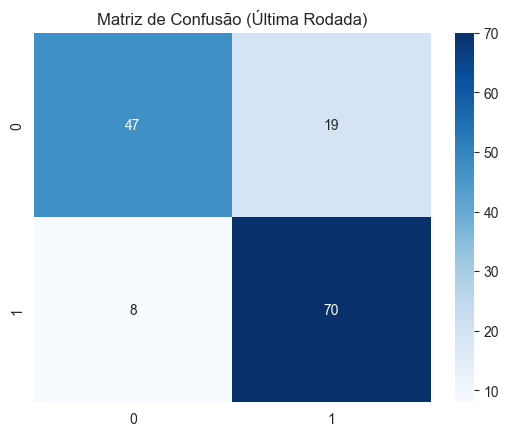

Acurácia média treino: 88.72%
Acurácia média teste: 82.42%


In [111]:
log_train, log_test = relatorio_ml(hd4, LogisticRegression, opt=0)

-- CLASSIFICATION REPORT --
              precision    recall  f1-score   support

           0       0.67      0.68      0.68        66
           1       0.73      0.72      0.72        78

    accuracy                           0.70       144
   macro avg       0.70      0.70      0.70       144
weighted avg       0.70      0.70      0.70       144



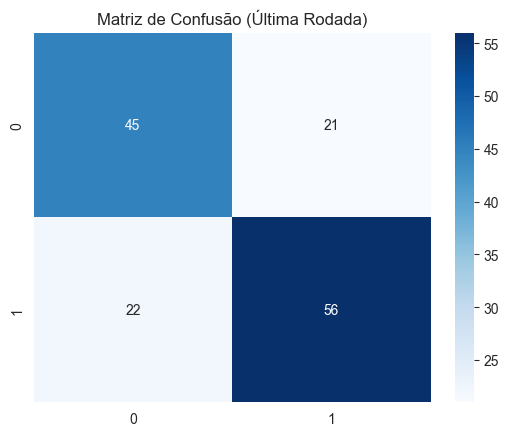

Acurácia média treino: 100.00%
Acurácia média teste: 72.56%


In [129]:
tree_train, tree_test = relatorio_ml(hd4, DecisionTreeClassifier, opt=3)

-- CLASSIFICATION REPORT --
              precision    recall  f1-score   support

           0       0.89      0.71      0.79        66
           1       0.79      0.92      0.85        78

    accuracy                           0.83       144
   macro avg       0.84      0.82      0.82       144
weighted avg       0.84      0.83      0.82       144



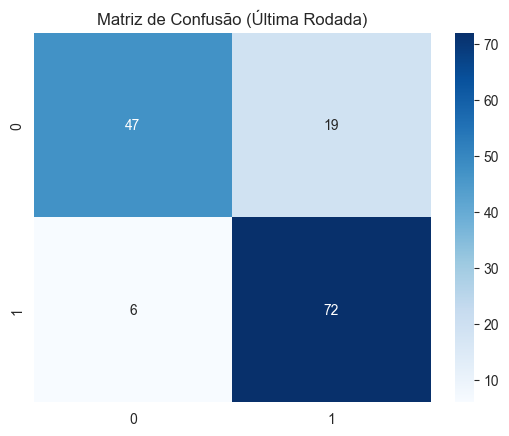

Acurácia média treino: 87.58%
Acurácia média teste: 81.80%


In [117]:
kn_train, kn_test = relatorio_ml(hd4, KNeighborsClassifier, opt=2)

-- CLASSIFICATION REPORT --
              precision    recall  f1-score   support

           0       0.90      0.65      0.75        66
           1       0.76      0.94      0.84        78

    accuracy                           0.81       144
   macro avg       0.83      0.79      0.80       144
weighted avg       0.82      0.81      0.80       144



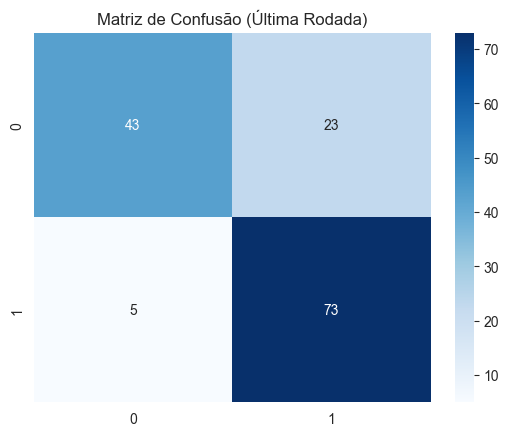

Acurácia média treino: 100.00%
Acurácia média teste: 81.73%


In [118]:
rand_train, rand_test = relatorio_ml(hd4, RandomForestClassifier, opt=2)

-- CLASSIFICATION REPORT --
              precision    recall  f1-score   support

           0       0.72      0.59      0.65        66
           1       0.70      0.81      0.75        78

    accuracy                           0.71       144
   macro avg       0.71      0.70      0.70       144
weighted avg       0.71      0.71      0.70       144



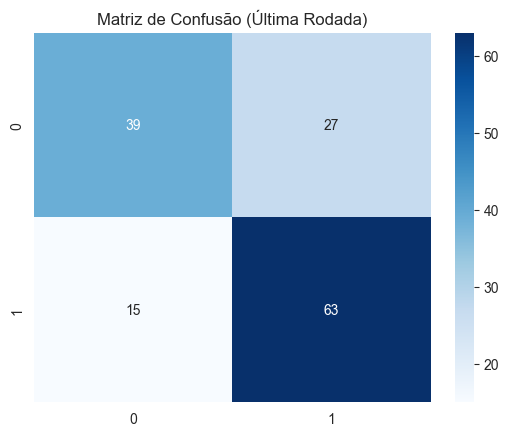

Acurácia média treino: 100.00%
Acurácia média teste: 76.54%


In [122]:
ada_train, ada_test = relatorio_ml(hd4, AdaBoostClassifier, opt=1)

In [130]:
data = {
    'Models': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Random Forest Classifier', 'Ada Boost'],
    'Acurácia Treino': [
        round(log_train[0] * 100, 2),
        round(tree_train[0] * 100, 2),
        round(kn_train[0] * 100, 2),
        round(rand_train[0] * 100, 2),
        round(ada_train[0] * 100, 2)
    ],
    'Acurácia Teste': [
        round(log_test[0] * 100, 2),
        round(tree_test[0] * 100, 2),
        round(kn_test[0] * 100, 2),
        round(rand_test[0] * 100, 2),
        round(ada_test[0] * 100, 2)
    ]
}


df = pd.DataFrame(data)
df.sort_values(by='Acurácia Teste', ascending=False, inplace=True)
df

,Models,Acurácia Treino,Acurácia Teste
2,KNeighbors,90.28,82.07
0,Logistic Regression,91.67,81.38
3,Random Forest Classifier,100.00,79.31
4,Ada Boost,100.00,76.55
1,Decision Tree,100.00,67.59
